In [455]:
import os
import cv2
import numpy as np

dir_path = './datasets/CLIPS_1'

def load_dataset():
    # Load images and labels
    images = []
    labels = []

    shape = (76, 76)
    
    for filename in os.listdir(os.path.join(dir_path)):
        img = cv2.imread(os.path.join(dir_path, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape == shape:
            images.append(img)
            
            if 'false' in filename:
                labels.append(0)
            else:
                labels.append(1)
    
    X = np.array(images)
    y = np.array(labels)
    
    X = X[..., np.newaxis]
    
    return X, y

In [456]:
X, y = load_dataset()

X.shape, y.shape

((93, 76, 76, 1), (93,))

In [457]:
from sklearn.model_selection import train_test_split

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalMaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

# Create a CNN model
model = Sequential()

# Add a convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(76, 76, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())
# Replace the Flatten layer with GlobalMaxPooling2D
# model.add(GlobalMaxPooling2D())

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
3/3 [==============================] - 3s 411ms/step - loss: 63.3983 - accuracy: 0.4459 - val_loss: 4.7215 - val_accuracy: 0.7895
Epoch 2/15
3/3 [==============================] - 1s 227ms/step - loss: 9.3208 - accuracy: 0.5676 - val_loss: 0.8592 - val_accuracy: 0.7895
Epoch 3/15
3/3 [==============================] - 1s 232ms/step - loss: 1.6711 - accuracy: 0.5000 - val_loss: 1.3576 - val_accuracy: 0.2632
Epoch 4/15
3/3 [==============================] - 1s 243ms/step - loss: 0.6333 - accuracy: 0.6622 - val_loss: 0.2281 - val_accuracy: 0.8947
Epoch 5/15
3/3 [==============================] - 1s 241ms/step - loss: 0.2635 - accuracy: 0.8784 - val_loss: 0.3004 - val_accuracy: 0.7895
Epoch 6/15
3/3 [==============================] - 1s 236ms/step - loss: 0.2141 - accuracy: 0.9054 - val_loss: 0.3758 - val_accuracy: 0.8421
Epoch 7/15
3/3 [==============================] - 1s 227ms/step - loss: 0.1094 - accuracy: 0.9730 - val_loss: 0.2270 - val_accuracy: 0.8947
Epoch 8/15
3/3 [===

In [460]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 74, 74, 64)        640       
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 35, 35, 64)        36928     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 flatten_43 (Flatten)        (None, 18496)             0         
                                                                 
 dense_86 (Dense)            (None, 64)              

In [461]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0412 - accuracy: 1.0000 - 71ms/epoch - 71ms/step


In [462]:
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 180ms/step


(19, 1)

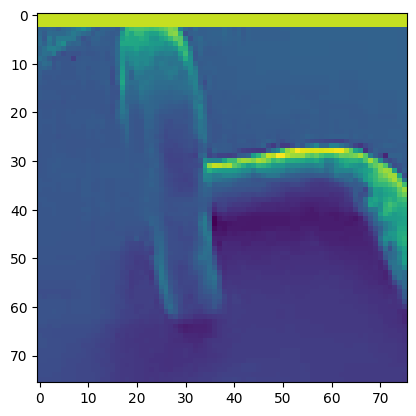

1 [0.56498986]


In [463]:
import matplotlib.pyplot as plt

i = 1

plt.imshow(X_test[i])
plt.show()

print(y_test[i], y_pred[i])

In [464]:
model.save('models/model_clips_v1.h5')

In [465]:
from tensorflow.keras.models import load_model

loaded_model = load_model('models/model_clips_v1.h5')